<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



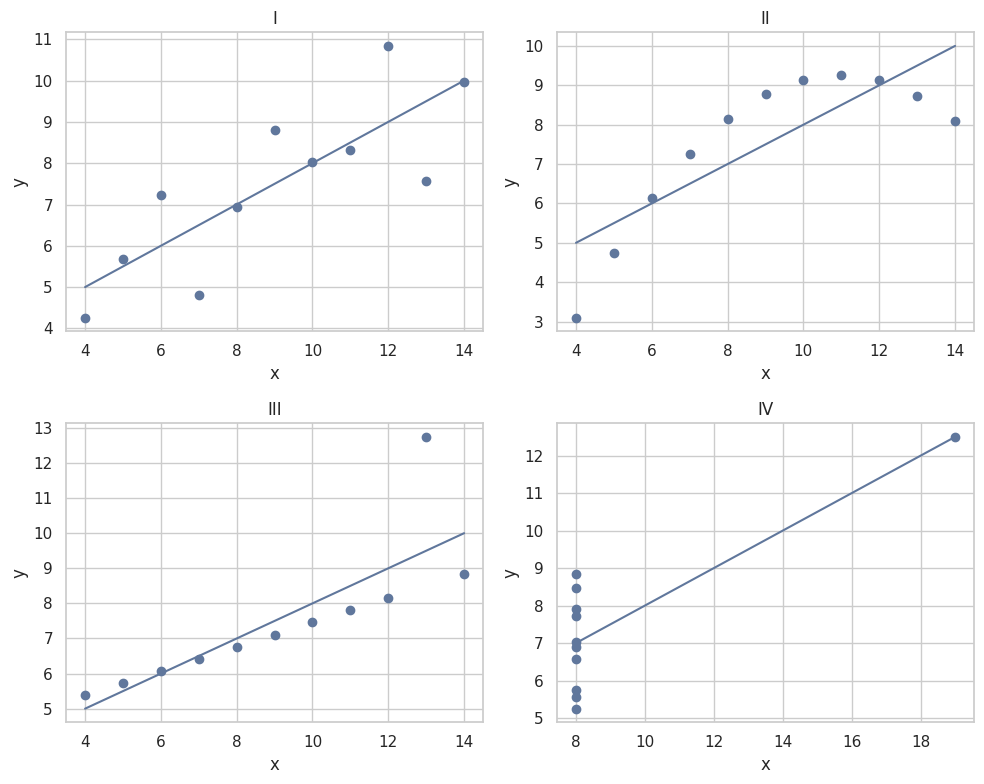

In [4]:
# FIXME
orden = ["I", "II", "III", "IV"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for ax, name in zip(axes, orden):
    df = data[data["dataset"] == name] #filtrado de los datos
    ax.scatter(df["x"], df["y"]) #grafico
    ax.set_title(f"{name}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    coef = np.polyfit(df["x"], df["y"], 1) #pendiente
    xx = np.linspace(df["x"].min(), df["x"].max(), 100) # puntos que estan en la recta
    ax.plot(xx, coef[0]*xx + coef[1]) # recta estimada

plt.tight_layout()
plt.show()

Al observar los cuatro dispersogramas, el grupo I muestra una relación aproximadamente lineal y homogénea; el II evidencia curvatura, por lo que un ajuste lineal sería insuficiente; el III presenta un valor atípico vertical que influye de forma desproporcionada en la pendiente; y el IV concentra casi todos los puntos en (x=8) con un único punto de alto apalancamiento en (x) grande que determina la recta. En suma, la estructura de cada nube sugiere comportamientos distintos pese a métricas globales similares.


2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [5]:
# FIXME
desc = (
    data.groupby("dataset")[["x", "y"]]
        .describe()                 # count, mean, std, min, 25%, 50%, 75%, max
        .round(3)
)
# Aplanar columnas (p.ej., x_mean, y_std, ...)
desc.columns = [f"{a}_{b}" for a, b in desc.columns]

print("=== describe() por grupo ===")
print(desc, "\n")

=== describe() por grupo ===
         x_count  x_mean  x_std  x_min  x_25%  x_50%  x_75%  x_max  y_count  \
dataset                                                                       
I           11.0     9.0  3.317    4.0    6.5    9.0   11.5   14.0     11.0   
II          11.0     9.0  3.317    4.0    6.5    9.0   11.5   14.0     11.0   
III         11.0     9.0  3.317    4.0    6.5    9.0   11.5   14.0     11.0   
IV          11.0     9.0  3.317    8.0    8.0    8.0    8.0   19.0     11.0   

         y_mean  y_std  y_min  y_25%  y_50%  y_75%  y_max  
dataset                                                    
I         7.501  2.032   4.26  6.315   7.58   8.57  10.84  
II        7.501  2.032   3.10  6.695   8.14   8.95   9.26  
III       7.500  2.030   5.39  6.250   7.11   7.98  12.74  
IV        7.501  2.031   5.25  6.170   7.04   8.19  12.50   



`describe()` muestra medias y desvíos muy similares entre grupos, pero los cuantiles y extremos marcan diferencias. En I, (y) es “regular”, sin valores dominantes; en II, leves desplazamientos y un mínimo más bajo sugieren curvatura. En III, un máximo alto revela un outlier vertical que condiciona la lectura. En IV, (x) colapsa en 8 (Q1=Q2=Q3=8) con un único (x) grande de alto apalancamiento; por eso, promedios parecidos no implican distribuciones comparables.


3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



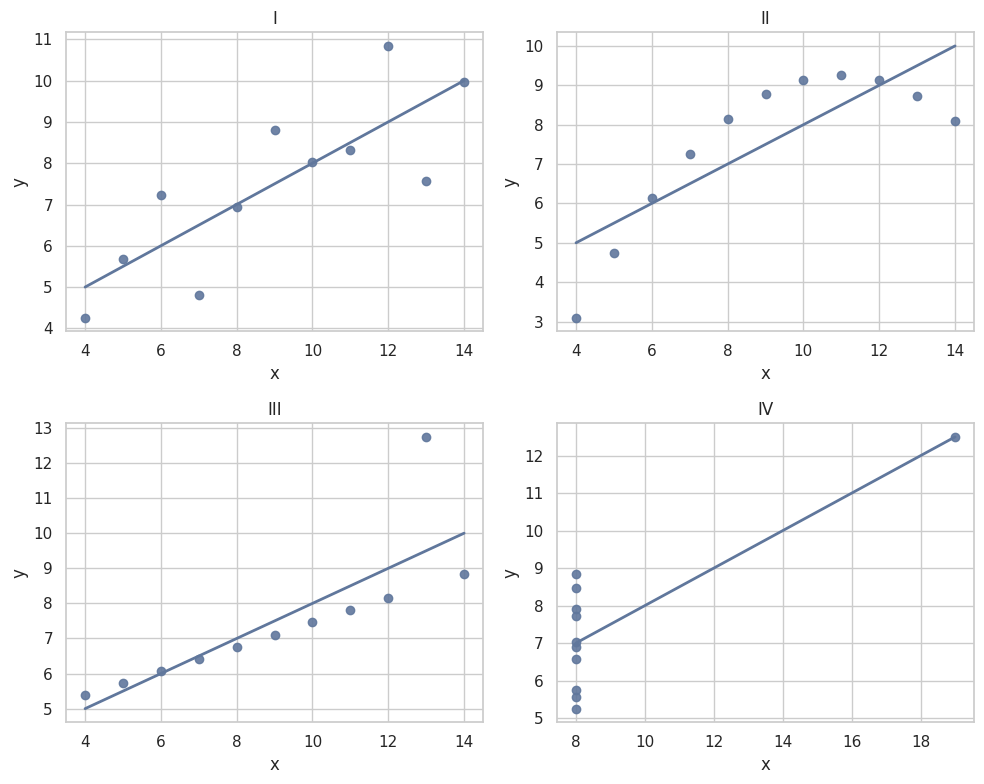

dataset  slope  intercept    MSE     R2
      I 0.5001     3.0001 1.2512 0.6665
     II 0.5000     3.0009 1.2524 0.6662
    III 0.4997     3.0025 1.2506 0.6663
     IV 0.4999     3.0017 1.2493 0.6667

I: lineal limpio; II: curvatura (recta simplifica); III: outlier vertical sesga; IV: outlier horizontal domina. MSE/R² parecidos, pero la calidad real cambia por forma/outliers.


In [6]:
# FIXME
res = []
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for ax, name in zip(axs.ravel(), orden):
    g = data[data["dataset"] == name]
    X = g[["x"]].values
    y = g["y"].values

    lr = LinearRegression().fit(X, y)
    xx = np.linspace(g["x"].min(), g["x"].max(), 100).reshape(-1, 1)

    ax.scatter(g["x"], g["y"], alpha=0.9)
    ax.plot(xx.ravel(), lr.predict(xx), linewidth=2)
    ax.set_title(name); ax.set_xlabel("x"); ax.set_ylabel("y")

    y_hat = lr.predict(X)
    res.append((name, lr.coef_[0], lr.intercept_,
                mean_squared_error(y, y_hat), r2_score(y, y_hat)))

plt.tight_layout(); plt.show()

metrics_df = pd.DataFrame(res, columns=["dataset","slope","intercept","MSE","R2"]) \
               .sort_values("dataset").reset_index(drop=True).round(4)
print(metrics_df.to_string(index=False))

print("\nI: lineal limpio; II: curvatura (recta simplifica); "
      "III: outlier vertical sesga; IV: outlier horizontal domina. "
      "MSE/R² parecidos, pero la calidad real cambia por forma/outliers.")


4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

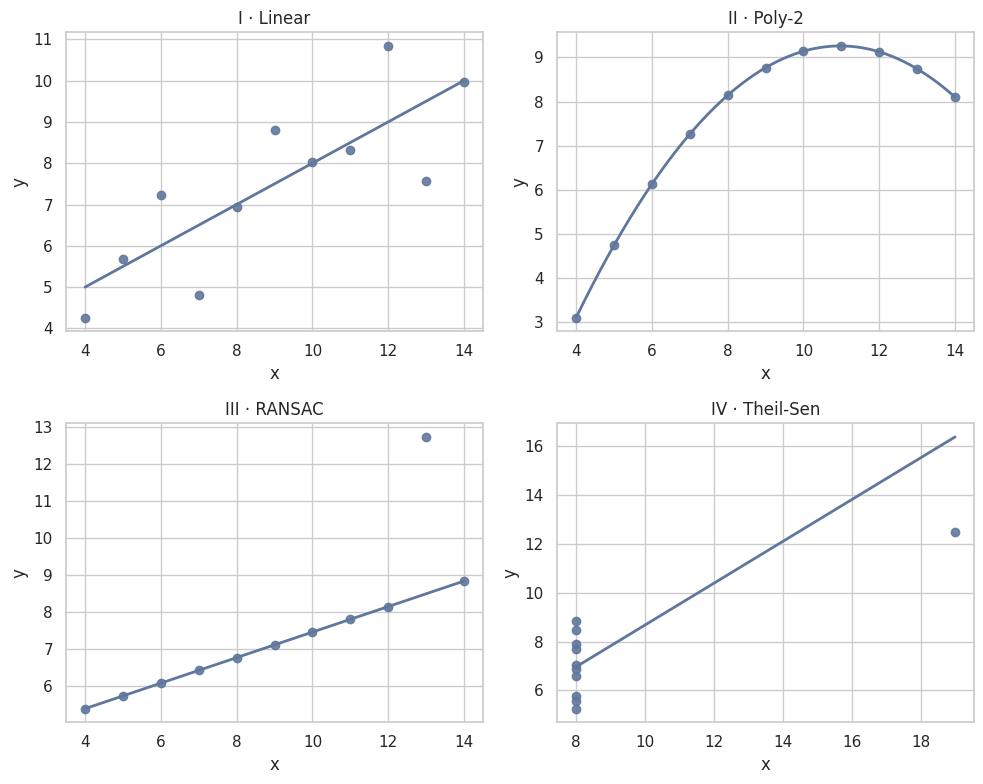


=== Métricas (modelos alternativos por grupo) ===
dataset    modelo    MSE     R2
      I    Linear 1.2512 0.6665
     II    Poly-2 0.0000 1.0000
    III    RANSAC 1.6376 0.5630
     IV Theil-Sen 2.6175 0.3017


In [9]:
# FIXME
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RANSACRegressor, TheilSenRegressor #para tener un mejor ajuste en las curvas
alt_resultados = []

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for ax, name in zip(axs.ravel(), orden):
    g = data[data["dataset"] == name]
    X = g[["x"]].values
    y = g["y"].values

    # Estrategia:
    # I: Lineal estándar (ya funciona bien)
    # II: Polinómico grado 2 (curvatura)
    # III: RANSAC (outlier vertical)
    # IV: Theil–Sen (robusto a leverage en x)
    if name == "I":
        model = LinearRegression()
        label = "Linear"
    elif name == "II":
        model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
        label = "Poly-2"
    elif name == "III":
        model = RANSACRegressor(estimator=LinearRegression(), random_state=0)
        label = "RANSAC"
    else:  # "IV"
        model = TheilSenRegressor(random_state=0)
        label = "Theil-Sen"

    model.fit(X, y)

    # Predicción suave en el rango de x para graficar
    xx = np.linspace(g["x"].min(), g["x"].max(), 200).reshape(-1, 1)
    yy = model.predict(xx)

    # Gráfico
    ax.scatter(g["x"], g["y"], alpha=0.9)
    ax.plot(xx.ravel(), yy, linewidth=2)
    ax.set_title(f"{name} · {label}")
    ax.set_xlabel("x"); ax.set_ylabel("y")

    # Métricas en los puntos observados
    y_hat = model.predict(X)
    alt_resultados.append((name, label,
                           mean_squared_error(y, y_hat),
                           r2_score(y, y_hat)))

plt.tight_layout(); plt.show()

alt_metrics = pd.DataFrame(alt_resultados, columns=["dataset", "modelo", "MSE", "R2"]) \
                 .sort_values("dataset").reset_index(drop=True).round(4)
print("\n=== Métricas (modelos alternativos por grupo) ===")
print(alt_metrics.to_string(index=False))